<a href="https://colab.research.google.com/github/SERVIR/GEDI_Earthhub_ARSET_Training/blob/main/neon_discrete_lidar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.neonscience.org/resources/learning-hub/tutorials/neon-discrete-point-clouds

R and Python guide: https://www.neonscience.org/resources/learning-hub/tutorials/neondatastackr

Introduction to NEON Discrete Lidar Data in Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data


In [ ]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data


In [ ]:
import os

folder_name = "Neon_PR_Data"

try:
    os.mkdir(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
except FileExistsError:
    print(f"Folder '{folder_name}' already exists.")
except Exception as e:
    print(f"An error occurred: {e}")

Folder 'Neon_PR_Data' already exists.


In [ ]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data
/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data


In [ ]:
data_root_path_1 = '/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data'

In [ ]:
!pip install gdal

In [ ]:
!pip install requests
# !pip install gdal
!pip install fiona
!pip install geopandas
!pip install rasterio
!pip install laspy
!pip install lazrs

In [ ]:
#import required packages
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import laspy
import pandas as pd

Uncomment for download needs

In [ ]:
# url = "https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/AOP/aop_python_modules/neon_aop_download_functions.py"
# response = requests.get(url)
# open("neon_aop_download_functions.py", "wb").write(response.content)

In [ ]:
# # check that script is saved in same folder:
# os.listdir()

In [ ]:
# from neon_aop_download_functions import *

In [ ]:
# # %load neon_aop_download_functions.py
# """
# Created on Mon Apr  8 08:18:00 2019
# @author: bhass

# Functions to display available urls and download NEON AOP data using the NEON Data API.
# """

# import requests, urllib, os

# def list_available_urls(product,site):
#     """
#     list_available urls lists the api url for a given product and site
#     --------
#      Inputs:
#          product: the data product code (eg. 'DP3.30015.001' - CHM)
#          site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
#     --------
#     Usage:
#     --------
#     jorn_chm_urls = list_available_urls('DP3.30015.001','JORN')
#     """
#     r = requests.get("http://data.neonscience.org/api/v0/products/" + product)
#     for i in range(len(r.json()['data']['siteCodes'])):
#         if site in r.json()['data']['siteCodes'][i]['siteCode']:
#             data_urls=r.json()['data']['siteCodes'][i]['availableDataUrls']
#     if 'data_urls' not in locals() or len(data_urls) == 0:
#         print('WARNING: no urls found for product ' + product + ' at site ' + site)
#     else:
#         return data_urls

# def list_available_urls_by_year(product,site,year):
#     """
#     list_available urls_by_year lists the api url for a given product, site, and year
#     --------
#      Inputs:
#          product: the data product code (eg. 'DP3.30015.001' - CHM)
#          site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
#          year: the year data was collected (eg. '2017','2018','2019')
#     --------
#     Usage:
#     --------
#     jorn_chm_2018_url = list_available_urls_by_year('DP3.30015.001','JORN','2018')
#     """
#     r = requests.get("http://data.neonscience.org/api/v0/products/" + product)
#     for i in range(len(r.json()['data']['siteCodes'])):
#         if site in r.json()['data']['siteCodes'][i]['siteCode']:
#             all_data_urls=r.json()['data']['siteCodes'][i]['availableDataUrls']
#     data_urls = [url for url in all_data_urls if year in url]
#     if len(data_urls)==0:
#         print('WARNING: no urls found for product ' + product + ' at site ' + site + ' in year ' + year)
#     else:
#         return data_urls

# def download_urls(url_list,download_folder_root,zip=False):
#     # downloads data from urls to folder, maintaining month-year folder structure
#     for url in url_list:
#         month = url.split('/')[-1]
#         download_folder = download_folder_root + month + '/'
#         if not os.path.exists(download_folder):
#             os.makedirs(download_folder)
#         r=requests.get(url)
#         files=r.json()['data']['files']
#         for i in range(len(files)):
#             if zip==False:
#                 if '.zip' not in files[i]['name']:
#                     print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     urllib.request.urlretrieve(files[i]['url'],download_folder + files[i]['name'])
#             elif zip==True:
#                 if '.zip' in files[i]['name']:
#                     print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     urllib.request.urlretrieve(files[i]['url'],download_folder + files[i]['name'])

# def download_file(url,filename):
#     r = requests.get(url)
#     with open(filename, 'wb') as f:
#         for chunk in r.iter_content(chunk_size=1024):
#             if chunk: # filter out keep-alive new chunks
#                 f.write(chunk)
#     return

# def get_file_size(urls,match_string):
#     size=0
#     for url in urls:
#         r = requests.get(url)
#         files = r.json()['data']['files']
#         for i in range(len(files)):
#             if match_string is not None:
#                 if match_string in files[i]['name']:
#     #             print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     size += int(files[i]['size'])
#             else:
#                 size += int(files[i]['size'])
#     if size < 10**3:
#         print('Download size:',size,'bytes')
#     elif size > 10**3 and size < 10**6:
#         print('Download size:',round(size/(10**6),2),'kB')
#     elif size > 10**6 and size < 10**9:
#         print('Download size:',round(size/(10**6),2),'MB')
#     elif size > 10**9 and size < 10**12:
#         print('Download size:',round(size/(10**9),2),'GB')
#     else:
#         print('Download size:',round(size/(10**12),2),'TB')
#     return size

# def download_aop_files(product,site,year=None,download_folder='./data',match_string=None,check_size=True):
#     """
#     download_aop_files downloads NEON AOP files from the AOP for a given data product, site, and
#     optional year, download folder, and
#     --------
#      Inputs:
#          required:
#              product: the data product code (eg. 'DP3.30015.001' - CHM)
#              site: the 4-digit NEON site code (eg. 'SRER', 'JORN')

#          optional:
#              year: year (eg. '2020'); default (None) is all years
#              download_folder: folder to store downloaded files; default (./data) in current directory
#              match_string: subset of data to match, need to use exact pattern for file name
#              check_size: prompt to continue download (y/n) after displaying size; default = True
#     --------
#     Usage:
#     --------
#     download_aop_files('DP3.30015.001','JORN','2019','./data/JORN_2019/CHM','314000_3610000_CHM.tif')
#     """

#     #get a list of the urls for a given data product, site, and year (if included)
#     if year is not None:
#         urls = list_available_urls_by_year(product,site,year)
#     else:
#         urls = list_available_urls(product,site)

#     #make the download folder if it doesn't already exist
#     if not os.path.exists(download_folder):
#         os.makedirs(download_folder)

#     #get the size of all the files you are planning to download
#     size = get_file_size(urls,match_string)

#     #prompt to continue with download after displaying the file size
#     if check_size:
#         if input("Do you want to continue with the download? (y/n) ") != "y":
#             print('Exiting download_aop_files')
#             return

#     #download files in the urls
#     for url in urls:
#         r = requests.get(url)
#         files = r.json()['data']['files']
#         for i in range(len(files)):
#             if match_string is not None:
#                 if match_string in files[i]['name']:
#                     print('downloading ' + files[i]['name'] + ' to ' + download_folder)
#                     try:
#                         download_file(files[i]['url'],os.path.join(download_folder,files[i]['name']))
#                     except requests.exceptions.RequestException as e:
#                         print(e)
#             else:
#                 try:
#                     download_file(files[i]['url'],os.path.join(download_folder,files[i]['name']))
#                 except requests.exceptions.RequestException as e:
#                     print(e)


In [ ]:
# %whos

In [ ]:
dpID='DP1.30003.001'
site = 'GUAN'

In [ ]:
# list_available_urls(dpID,site)

In [ ]:
year='2018'
data_root_path = data_root_path_1+'/'+site+'/'+year+'/'
shp_path = data_root_path+'shp/'
kml_path = data_root_path+'kml/'
laz_path = data_root_path+'laz/'
print(data_root_path)

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/


In [ ]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data


# LIDAR

Uncomment for download needs

In [ ]:
# #download the QA reports to the default download directory (./data)
# download_aop_files(dpID,site,year,match_string='.pdf',check_size=False)

In [ ]:
# #download the full-boundary shape files
# download_aop_files(dpID,site,year,shp_path,'merged_tiles.shp',check_size=False)
# download_aop_files(dpID,site,year,shp_path,'merged_tiles.shx',check_size=False)

In [ ]:
os.listdir(shp_path)

['2018_GUAN_1_merged_tiles.shp', '2018_GUAN_1_merged_tiles.shx']

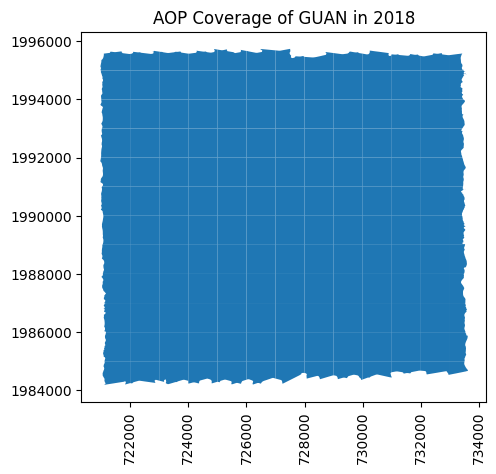

In [ ]:
gdf = gpd.read_file(os.path.join(shp_path,'2018_GUAN_1_merged_tiles.shp'))
gdf.plot();
ax = plt.gca(); ax.ticklabel_format(style='plain')
ax.set_title('AOP Coverage of ' + site + ' in ' + year);
plt.xticks(rotation=90); #optionally rotate the xtick labels

In [ ]:
# download_aop_files(dpID,site,year,kml_path,'full_boundary.kml',check_size=False)

In [ ]:
# download_aop_files('DP1.30003.001',site,year,laz_path,match_string='725000_1985000_classified_point_cloud_colorized.laz')

In [ ]:
os.listdir(laz_path)

['NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz']

In [ ]:
# use os.path.join to get the full path of the laz file
laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz')
# read the laz file into a LasData object using laspy.read()
point_cloud=laspy.read(laz_data_file)

In [ ]:
point_cloud

<LasData(1.3, point fmt: <PointFormat(3, 4 bytes of extra dims)>, 2968778 points, 2 vlrs)>

In [ ]:
list(point_cloud.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'reversible index (lastile)']

In [ ]:
point_cloud.classification

<SubFieldView([2 2 2 ... 7 7 7])>

In [ ]:
set(list(point_cloud.classification))

{1, 2, 5, 6, 7}

In [ ]:
point_cloud.xyz

array([[ 7.25894810e+05,  1.98500265e+06,  2.50000000e-01],
       [ 7.25915210e+05,  1.98500018e+06,  4.20000000e-01],
       [ 7.25893550e+05,  1.98500798e+06,  2.20000000e-01],
       ...,
       [ 7.25085510e+05,  1.98583553e+06, -1.80370000e+02],
       [ 7.25101320e+05,  1.98584004e+06, -2.37230000e+02],
       [ 7.25122790e+05,  1.98583813e+06, -3.05320000e+02]])

In [ ]:
xyz = point_cloud.xyz

In [ ]:
factor=10
points_dec = xyz[::factor]

In [ ]:
# points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [ ]:
colors_norm = (colors - np.min(colors))/np.ptp(colors)
colors_dec = colors_norm[::factor]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

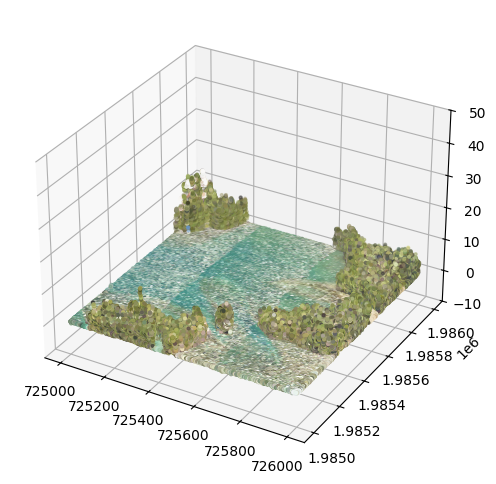

In [ ]:
# Plot the las data in 3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_dec[:,0],points_dec[:,1],points_dec[:,2],color=colors_dec,s=4)
ax.set_zlim3d(-10,50)
plt.show()

In [ ]:
import rasterio
from rasterio.plot import show

In [ ]:
l3_path = data_root_path+'L3/'

Uncomment for download needs

In [ ]:
# download_aop_files('DP3.30015.001',site,year,l3_path,match_string='725000_1985000_CHM.tif',check_size=False)
# download_aop_files('DP3.30024.001',site,year,l3_path,match_string='725000_1985000_DTM.tif',check_size=False)
# download_aop_files('DP3.30024.001',site,year,l3_path,match_string='725000_1985000_DSM.tif',check_size=False)

In [ ]:
chm = rasterio.open(os.path.join(l3_path,'NEON_D04_GUAN_DP3_725000_1985000_CHM.tif'))
dtm = rasterio.open(os.path.join(l3_path,'NEON_D04_GUAN_DP3_725000_1985000_DTM.tif'))
dsm = rasterio.open(os.path.join(l3_path,'NEON_D04_GUAN_DP3_725000_1985000_DSM.tif'))

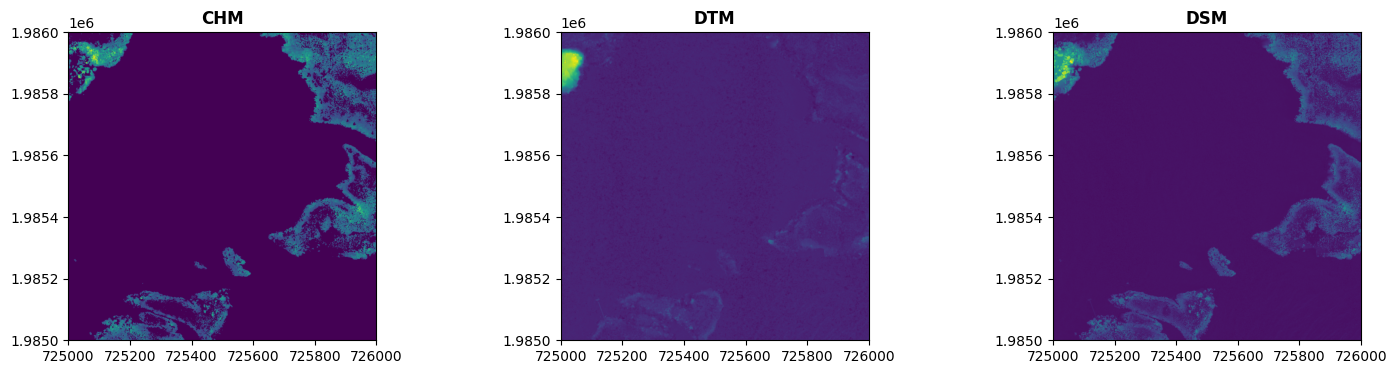

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
show((chm), ax=ax1, title='CHM');
show((dtm), ax=ax2, title='DTM');
show((dsm), ax=ax3, title='DSM');
plt.show;

# Dev space

https://www.neonscience.org/resources/learning-hub/tutorials/discrete-lidar-wildfires

In [ ]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data


In [ ]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/laz

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/laz


In [ ]:
## Function to import las file as a dataframe in python
def las_to_df(las):
  x = pd.DataFrame(np.array(las.x))
  y = pd.DataFrame(np.array(las.y))
  z = pd.DataFrame(np.array(las.z))
  intensity = pd.DataFrame(np.array(las.intensity))
  return_num = pd.DataFrame(np.array(las.return_number))
  number_of_returns = pd.DataFrame(np.array(las.number_of_returns))
  classification = pd.DataFrame(np.array(las.classification)) ## 0 - 31 as per ASPRS classification scheme

  df = pd.concat([x, y, z, intensity, return_num, number_of_returns, classification], axis=1)
  df.columns=["x", "y", "z", "intensity", "return_num", "number_of_returns", "classification"]
  return(df)

In [ ]:
point_cloud_df = las_to_df(point_cloud)

In [ ]:
point_cloud_df

,x,y,z,intensity,return_num,number_of_returns,classification
0,725894.81,1985002.65,0.25,1,1,1,2
1,725915.21,1985000.18,0.42,1,1,1,2
2,725893.55,1985007.98,0.22,1,1,1,2
3,725920.37,1985002.03,0.36,1,1,1,2
4,725919.61,1985002.27,0.43,1,1,1,2
...,...,...,...,...,...,...,...
2968773,725032.27,1985784.28,0.18,1,1,1,7
2968774,725028.81,1985785.23,0.23,1,1,1,7
2968775,725085.51,1985835.53,-180.37,2,2,2,7
2968776,725101.32,1985840.04,-237.23,2,2,2,7


In [ ]:
point_cloud_df_high_veg = point_cloud_df[point_cloud_df["classification"] == 5]

In [ ]:
-point_cloud_df_high_veg

,x,y,z,intensity,return_num,number_of_returns,classification
11828,-725931.50,-1985260.74,-2.56,65534,255,255,251
11832,-725927.35,-1985261.75,-2.52,65535,255,255,251
11835,-725925.31,-1985262.25,-2.31,65532,255,255,251
11839,-725927.27,-1985261.84,-2.48,65535,255,255,251
11844,-725931.65,-1985260.78,-2.22,65533,255,255,251
...,...,...,...,...,...,...,...
2957723,-725128.00,-1985964.64,-2.82,65528,255,255,251
2957724,-725127.94,-1985964.66,-2.63,65528,255,255,251
2957725,-725127.74,-1985964.71,-2.70,65529,255,255,251
2958134,-725128.93,-1985965.59,-2.66,65527,255,255,251


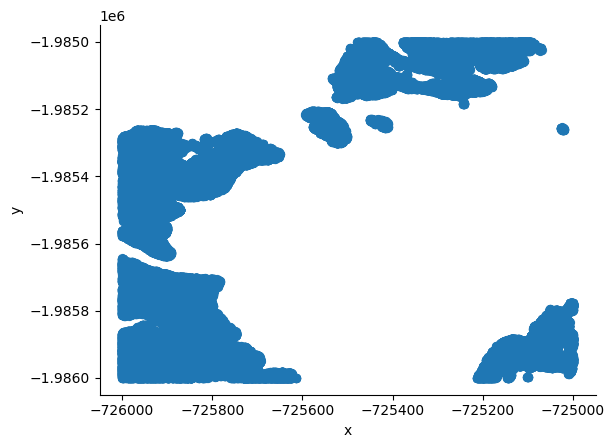

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Combine forest inventory/measures with LIDAR obs

In [ ]:
! pip install neonutilities

In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN


In [ ]:
# import os

# folder_name = "Veg_Field_Data"

# try:
#     os.mkdir(folder_name)
#     print(f"Folder '{folder_name}' created successfully.")
# except FileExistsError:
#     print(f"Folder '{folder_name}' already exists.")
# except Exception as e:
#     print(f"An error occurred: {e}")

In [ ]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data


In [ ]:
import neonutilities as neon
import os

# Define the parameters
dpid = "DP1.10098.001"  # Data product ID#
site = "GUAN"  # Site ID
package = "basic"
release = "RELEASE-2023"

# Define the output directory
veg_folder = '/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data'
output_dir = veg_folder

# Download and load the data
#neon.download_data(dpID, site=site, package=package, release=release, output_dir=output_dir)
veglist = neon.load_by_product(dpid=dpid, site=site, package=package, release=release)


# # Load the data
# veglist = neon.load_data(output_dir)
veglist.keys()

# # Display the available data tables
print(veglist.keys())


100%|██████████| 29/29 [00:16<00:00,  1.73it/s]


Continuing will download 29 files totaling approximately 78.8 MB. Do you want to proceed? (y/n) y


 60%|██████    | 3/5 [00:00<00:00,  3.26it/s]

In [ ]:
veglist

In [ ]:
# # Modify the file path to the file location on your computer
# stack = neon.stack_by_table('/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data')
# stack

Hack 3 converting this R script : https://github.com/NEONScience/NEON-geolocation/blob/main/geoNEON/R/getLocVSTmapped.R

https://github.com/NEONScience/NEON-geolocation/blob/main/geoNEON/R/getLocByName.R

In [ ]:
def get_loc_vst_mapped(data, token=None):
    # Ensure required columns are present
    required_columns = ['namedLocation', 'plotID', 'subplotID', 'stemAzimuth', 'stemDistance']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Missing required column: {col}")

    # Drop rows with missing geolocation data
    data = data.dropna(subset=['stemAzimuth', 'stemDistance'])

    # Fetch plot center coordinates
    plot_centers = fetch_plot_centers(data['plotID'].unique(), token)

    # Merge plot centers with the original data
    data = data.merge(plot_centers, on='plotID', how='left')

    # Calculate individual tree coordinates
    data['adjEasting'] = data['easting'] + data['stemDistance'] * np.sin(np.radians(data['stemAzimuth']))
    data['adjNorthing'] = data['northing'] + data['stemDistance'] * np.cos(np.radians(data['stemAzimuth']))

    return data


In [ ]:
def fetch_plot_centers(plot_ids, token=None):
    base_url = "https://data.neonscience.org/api/v0/locations/"
    headers = {'Authorization': f'Bearer {token}'} if token else {}

    plot_data = []
    for plot_id in plot_ids:
        response = requests.get(f"{base_url}{plot_id}", headers=headers)
        if response.status_code == 200:
            loc_data = response.json()
            utm_coords = loc_data['data']['locationUtm']
            plot_data.append({
                'plotID': plot_id,
                'easting': utm_coords['utmEasting'],
                'northing': utm_coords['utmNorthing']
            })
        else:
            print(f"Failed to fetch data for plotID: {plot_id}")

    return pd.DataFrame(plot_data)


In [ ]:
# Load your vegetation data into veg_data DataFrame
# veg_data = pd.read_csv('path_to_your_data.csv')

# Call the function to get refined geolocations
refined_data = get_loc_vst_mapped(veglist, token='your_api_token')

# Display the first few rows of the refined data
print(refined_data.head())


In [ ]:
!pwd

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data


In [ ]:
# %load_ext rpy2.ipython

In [ ]:
# %%R
# install.packages("neonUtilities")
# install.packages("neonOS")
# install.packages("terra")
# install.packages("devtools")
# devtools::install_github("NEONScience/NEON-geolocation/geoNEON")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2qUADz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2qUADz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2qUADz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2qUADz/downloaded_packages’


Exception ignored from cffi callback <function _processevents at 0x7ad6585b4180>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 


These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                             
2: CRAN packages only              
3: None                            
4: jsonlite (1.8.9 -> 1.9.0) [CRAN]
5: curl     (6.2.0 -> 6.2.1) [CRAN]



Exception ignored from cffi callback <function _consoleread at 0x7ad65856f740>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 66, in _consoleread
    reply = consoleread(s)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 52, in consoleread
    return input(prompt)
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1177, in raw_input
    return self._input_request(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1219, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2qUADz/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp2qUADz/remotes1a25801db93/NEONScience-NEON-geolocation-59bdef7/geoNEON/DESCRIPTION’ ... OK
* preparing ‘geoNEON’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘geoNEON_1.0.0.9600.tar.gz’



(as ‘lib’ is unspecified)



In [ ]:
# %%R
# library(terra)
# library(neonUtilities)
# library(neonOS)
# library(geoNEON)

In [ ]:
# %%R
# x <- 42
# print(x)

-break

In [ ]:
vegmap = veglist['vst_mappingandtagging']
vegmap

,uid,namedLocation,date,eventID,domainID,siteID,plotID,subplotID,nestedSubplotID,pointID,...,identificationReferences,morphospeciesID,morphospeciesIDRemarks,identificationQualifier,remarks,measuredBy,recordedBy,dataQF,publicationDate,release
0,02d00b0f-39d2-40c3-b02d-bf988d8100d3,GUAN_044.basePlot.vst,2013-04-04,vst_GUAN_2017,D04,GUAN,GUAN_044,39,,,...,,,,,,tvelazquez-rojas@battelleecology.org,amegill@battelleecology.org,,20230109T191001Z,RELEASE-2023
1,9a9fe780-07e1-4067-9697-97ab3055f23a,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
2,cdc0b2d9-c155-4c0a-bf1d-89689e197456,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
3,6dea2800-66f0-49aa-8320-3a5efcd218e0,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,emartinez@field-ops.org,wplaza-muniz@field-ops.org,,20230109T191001Z,RELEASE-2023
4,d35a6ed8-7941-46fe-a8ed-37a037a5bde2,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,,...,,,,,,wplaza-muniz@field-ops.org,adavila@neoninc.org,,20230109T191001Z,RELEASE-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,8c8c2fe4-b316-4736-b8ca-7ff4870d619a,GUAN_017.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_017,21,,31,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7353,4390ae49-8a20-411d-a27c-62d35c3bfe98,GUAN_016.basePlot.vst,2022-09-01,vst_GUAN_2022,D04,GUAN,GUAN_016,41,,51,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7354,c09f3dd0-b4e7-4635-b101-85adbf462fab,GUAN_010.basePlot.vst,2022-10-04,vst_GUAN_2022,D04,GUAN,GUAN_010,32,,33,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023
7355,738b8e59-f9c1-4340-a3ed-bc5171d52e3d,GUAN_009.basePlot.vst,2022-10-12,vst_GUAN_2022,D04,GUAN,GUAN_009,41,,41,...,,,,,,0000-0002-9129-5419,0000-0002-6589-9569,,20230109T191001Z,RELEASE-2023


In [ ]:
# Apply the function
refined_data = get_loc_vst_mapped(veg_data, plot_centers)

# Display results
print(refined_data)

AttributeError: 'dict' object has no attribute 'columns'

In [ ]:
# Print column names using a loop
for col in vegmap.columns:
    print(col)

# Print column names as a list
print(vegmap.columns.tolist())

In [ ]:
vegmap

In [ ]:

x1 = veglist['vst_apparentindividual']
y1 = veglist['vst_mappingandtagging']

frames = [x1, y1]

veg = pd.concat(frames)
veg

In [ ]:
# Print column names using a loop
for col in veg.columns:
    print(col)

# Print column names as a list
print(veg.columns.tolist())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load vegetation data (assuming it's in a Pandas DataFrame)
# Example: veg = pd.read_csv("veg_data.csv")

# Filter data for plot ID "WREF_075"
filtered_veg = veg[veg['plotID'] == "GUAN_010"]  #WREF_075

# Extract coordinates and stem diameters
x = filtered_veg['adjEasting']
y = filtered_veg['adjNorthing']
sizes = (filtered_veg['stemDiameter'] / 100 / 2) ** 2  # Convert to radius and scale for visibility

# Create scatter plot with varying circle sizes
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes * 1000, alpha=0.5, edgecolors="black")  # Scale sizes for better visualization
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("Tree Stem Diameter Visualization for WREF_075")
plt.grid(True)

plt.show()
